Performing Exploratory Data Analysis[EDA]
- Inspect the Data
- Explore the data characteristcs
- Visualize data relation ex: using piecharts, histograms etc.
- handling outliers

In [ ]:
import pandas as pd

train_df = pd.read_csv('train.csv')

shape = train_df.shape
dtype = train_df.dtypes
head = train_df.head()
summary = train_df.describe()
mode = train_df.mode().iloc[0]
skewness = train_df.skew(numeric_only=True)
kurtosis = train_df.kurtosis(numeric_only=True)

shape, dtype, head, summary, mode, skewness, kurtosis

((1000, 9),
 Timestamp               object
 Device_ID               object
 Temp_Sensor            float64
 Vibration_Level        float64
 Voltage_Fluctuation    float64
 Signal_Strength        float64
 Runtime_Hours            int64
 Error_Code               int64
 Vibration_Rolling3     float64
 dtype: object,
           Timestamp Device_ID  Temp_Sensor  Vibration_Level  \
 0  2025-01-01 00:00   DVC-009        73.71             0.87   
 1  2025-01-01 00:10   DVC-007        71.40             0.76   
 2  2025-01-01 00:20   DVC-006        72.35             1.12   
 3  2025-01-01 00:30   DVC-001        72.26             0.51   
 4  2025-01-01 00:40   DVC-005        72.09             1.13   
 
    Voltage_Fluctuation  Signal_Strength  Runtime_Hours  Error_Code  \
 0                0.047             89.7             34           0   
 1                0.053             87.6             51           0   
 2                0.060             86.0             40           0   
 3            

In [ ]:
#Missing values

missing_val = train_df.isnull().sum()
print("Missing values: ", missing_val)

Missing values:  Timestamp              0
Device_ID              0
Temp_Sensor            0
Vibration_Level        0
Voltage_Fluctuation    0
Signal_Strength        0
Runtime_Hours          0
Error_Code             0
Vibration_Rolling3     0
dtype: int64


In [ ]:
#Handling the outliers

import numpy as np
from scipy.stats import zscore

numerical_cols = train_df.select_dtypes(include=np.number).columns

outlier_counts = {}
z_scores = train_df[numerical_cols].apply(zscore)

for col in numerical_cols:
    outliers = z_scores[np.abs(z_scores[col]) > 3]
    outlier_counts[col] = outliers.shape[0]

outlier_counts

{'Temp_Sensor': 3,
 'Vibration_Level': 1,
 'Voltage_Fluctuation': 1,
 'Signal_Strength': 1,
 'Runtime_Hours': 0,
 'Error_Code': 0,
 'Vibration_Rolling3': 2}

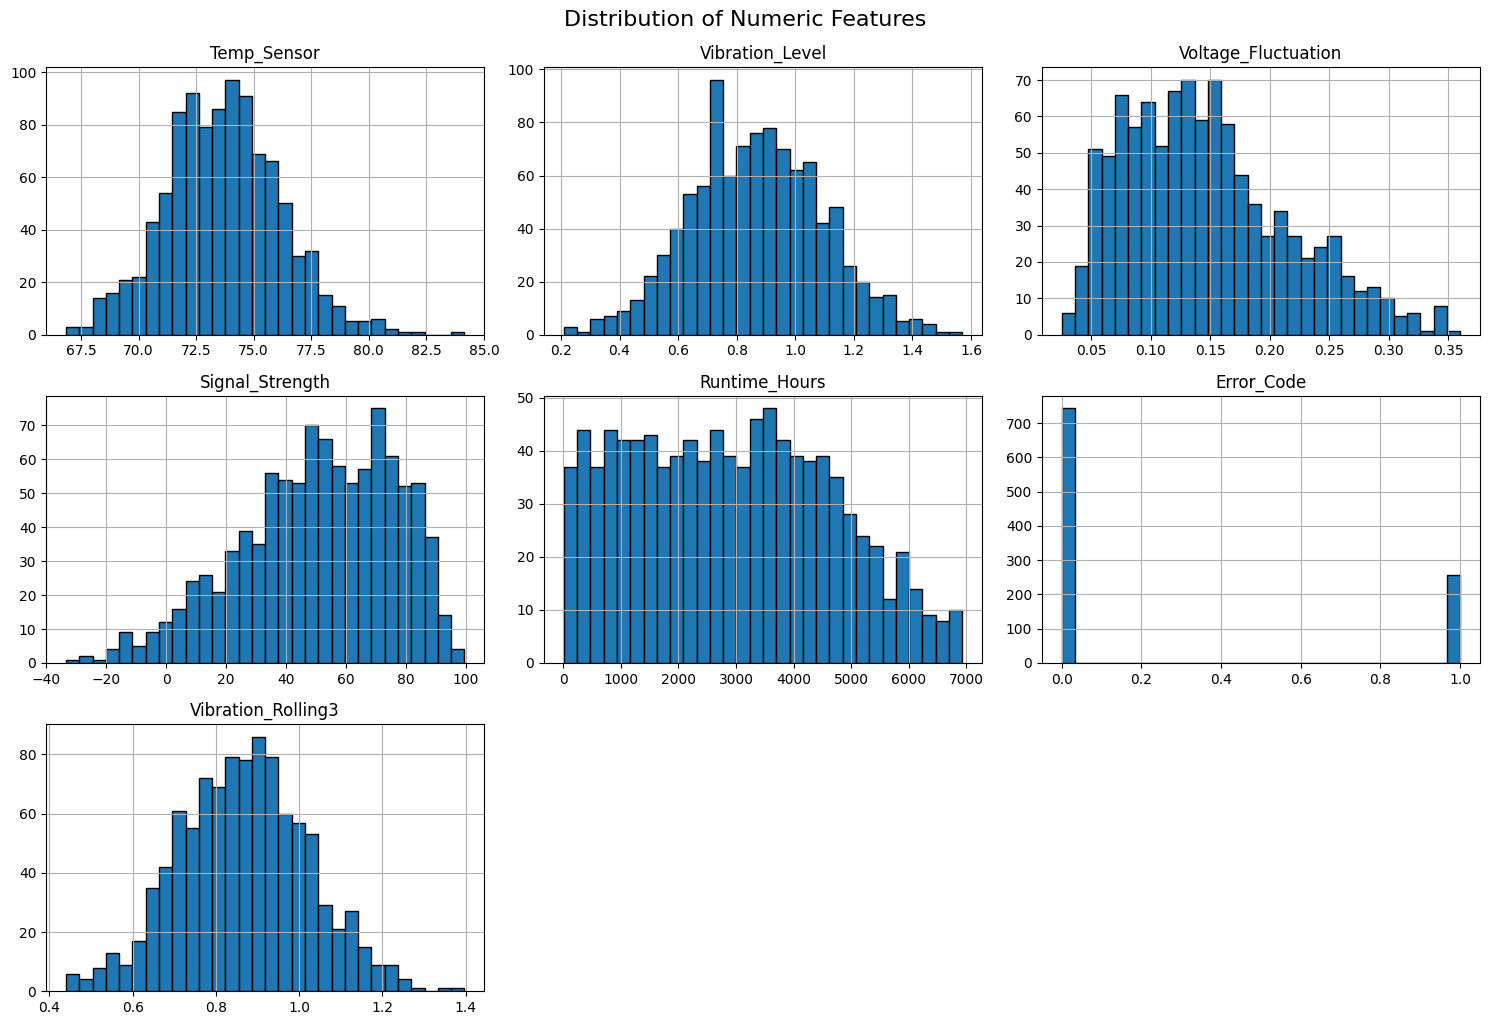

In [ ]:
#Visualieze the Data
import matplotlib.pyplot as plt

numeric_data = train_df.select_dtypes(include=np.number)

numeric_data.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.suptitle("Distribution of Numeric Features", fontsize=16, y=1.02)
plt.show()


<ipython-input-6-80bc76801e35>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Error_Code', y=feature, data=train_df, palette='Set2')
<ipython-input-6-80bc76801e35>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Error_Code', y=feature, data=train_df, palette='Set2')
<ipython-input-6-80bc76801e35>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Error_Code', y=feature, data=train_df, palette='Set2')
<ipython-input-6-80bc76801e35>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in

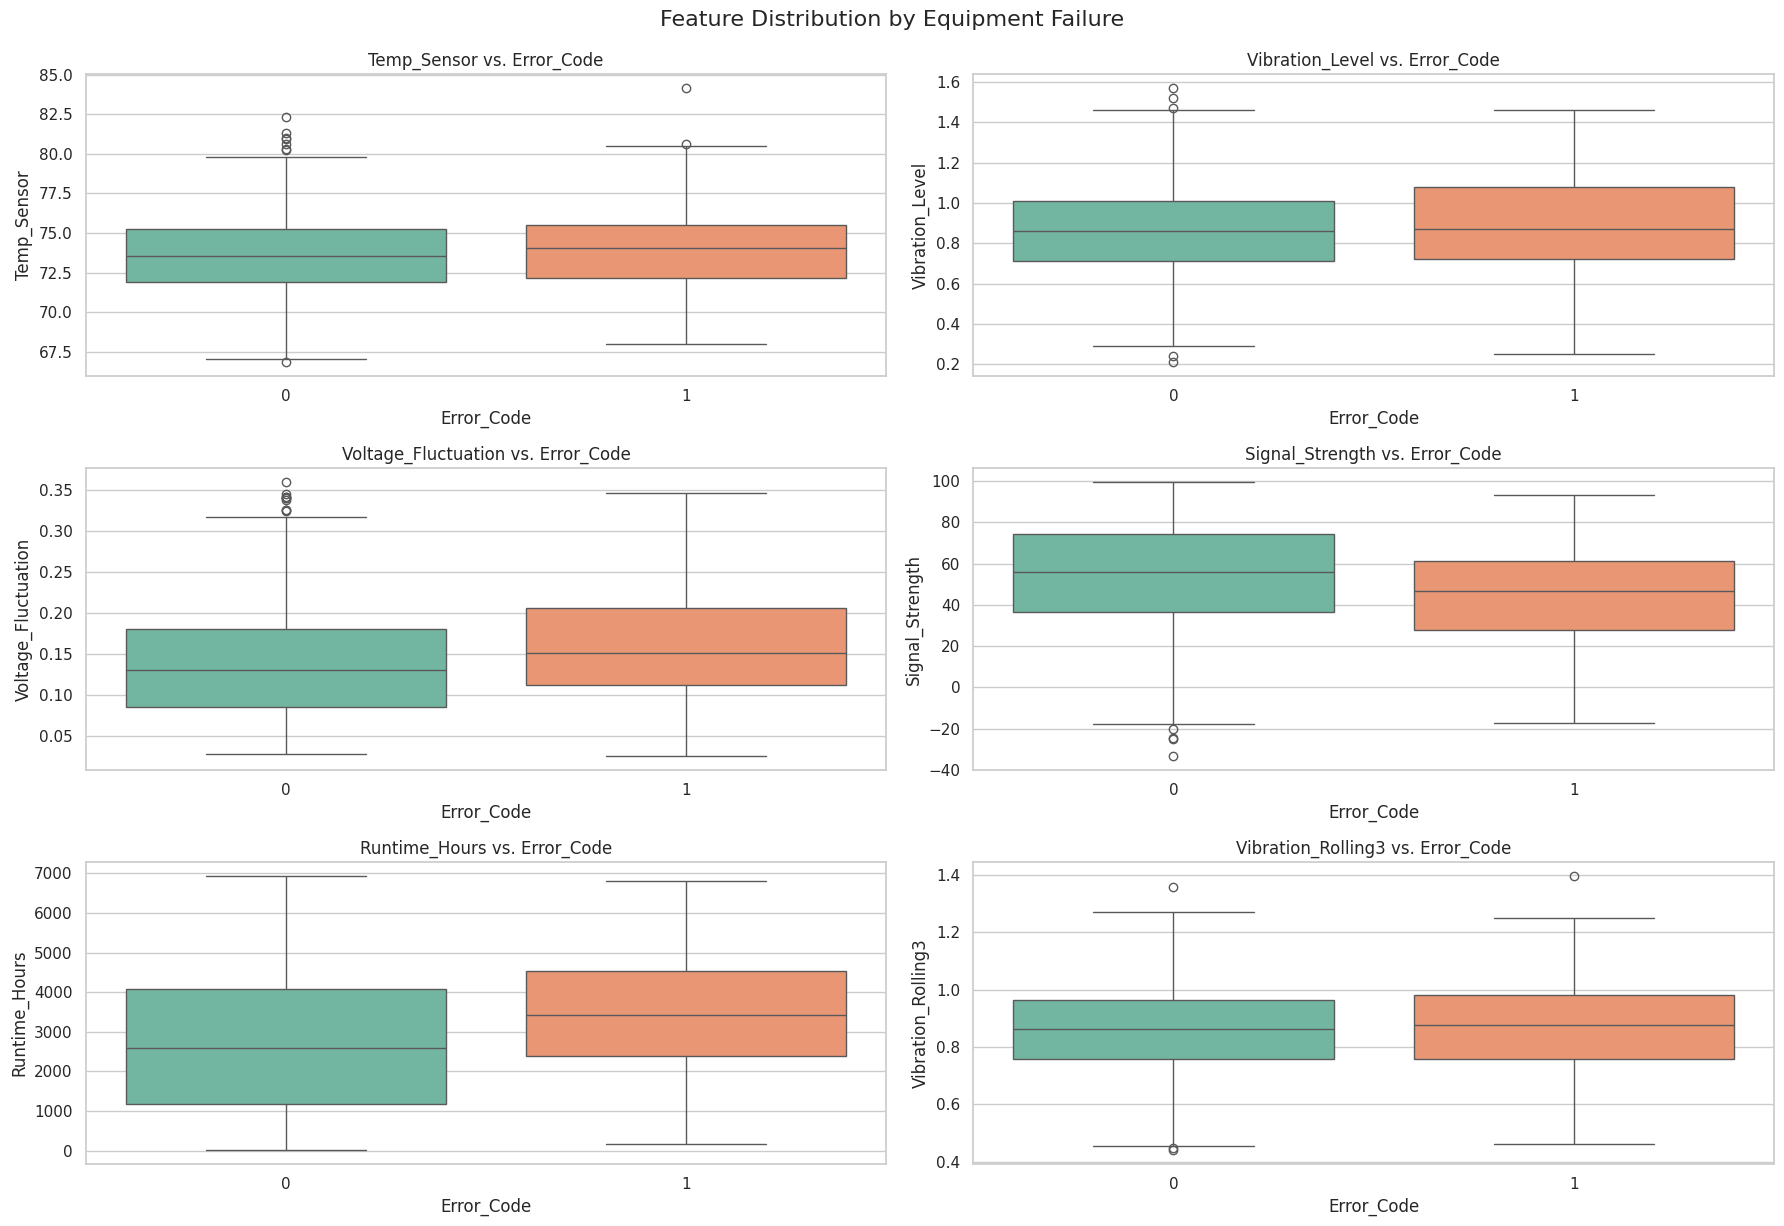

In [ ]:
#Visualize error_code vs all other feature for failure

import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

features = ['Temp_Sensor', 'Vibration_Level', 'Voltage_Fluctuation',
            'Signal_Strength', 'Runtime_Hours', 'Vibration_Rolling3']


plt.figure(figsize=(18, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='Error_Code', y=feature, data=train_df, palette='Set2')
    plt.title(f'{feature} vs. Error_Code')

plt.tight_layout()
plt.suptitle('Feature Distribution by Equipment Failure', fontsize=16, y=1.02)
plt.show()


2. **Build Predictive Models**
   - Train at least two classification models - e.g., Logistic Regression, XGBoost.
   - Evaluate your models using:
     - Recall
     - Confusion matrix
     - ROC AUC (optional)

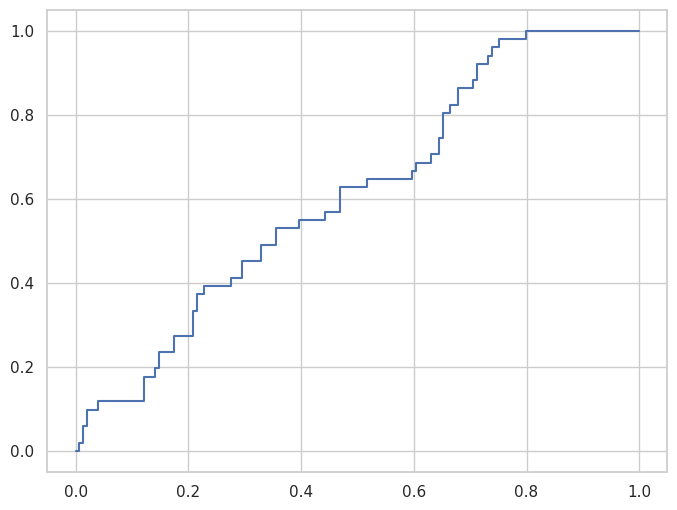

In [ ]:
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

df = train_df.copy()
df['Device_ID'] = LabelEncoder().fit_transform(df['Device_ID'])
X = df.drop(columns=['Timestamp', 'Error_Code'])
y = df['Error_Code']


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')

--- XGBoost Classifier ---
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       149
           1       0.38      0.29      0.33        51

    accuracy                           0.70       200
   macro avg       0.58      0.57      0.57       200
weighted avg       0.68      0.70      0.69       200

Confusion Matrix:
[[125  24]
 [ 36  15]]
ROC AUC Score: 0.6270561916041585




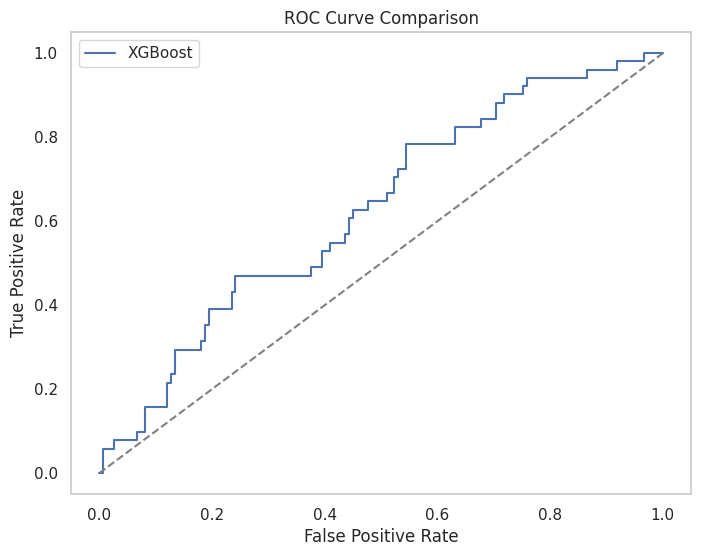

In [ ]:
#XGBoost
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scale_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb_model = XGBClassifier(
    scale_pos_weight=scale_ratio,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train_resampled, y_train_resampled)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

#Evaluation Function
def evaluate_model(y_true, y_pred, y_proba, model_name):
    print(f"--- {model_name} ---")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_true, y_proba))
    print("\n")

evaluate_model(y_test, y_pred_xgb, y_proba_xgb, "XGBoost Classifier")
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters:
 {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 0, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}
--- Tuned XGBoost (Threshold=0.3) ---
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       149
           1       0.32      0.39      0.35        51

    accuracy                           0.63       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.66      0.63      0.64       200

Confusion Matrix:
[[106  43]
 [ 31  20]]
ROC AUC Score: 0.6669298591919989


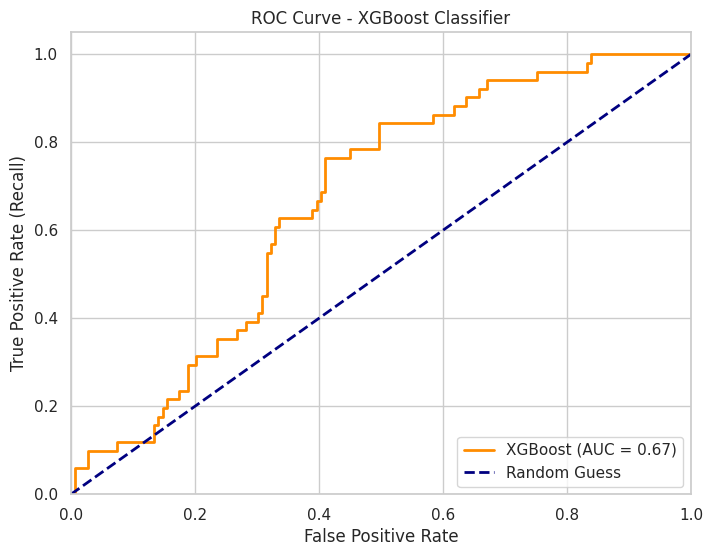

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc



# Parameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 0.9],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 10]
}


xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    scoring='roc_auc',
    cv=3,
    n_iter=20,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_
print("Best Parameters:\n", random_search.best_params_)

y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]
# Adjust threshold from 0.5 to 0.3
threshold = 0.3
y_pred_adjusted = (y_proba_best > threshold).astype(int)

print(f"--- Tuned XGBoost (Threshold={threshold}) ---")
print(classification_report(y_test, y_pred_adjusted))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_best))

fpr, tpr, _ = roc_curve(y_test, y_proba_best)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



Feature engineering - 1

In [ ]:
import pandas as pd

train_df = pd.read_csv('train.csv')

train_df = train_df.sort_values(by='Timestamp')

# 1. Vibration_Mean_3 → Rolling average of last 3 readings
train_df['Vibration_Mean_3'] = train_df['Vibration_Level'].rolling(window=3).mean()

# 2. Signal_Change → Difference from previous signal
train_df['Signal_Change'] = train_df['Signal_Strength'].diff()

# 3. Vibration/Temp Ratio
train_df['Vib_Temp_Ratio'] = train_df['Vibration_Level'] / train_df['Temp_Sensor']

# Remove rows with NaN (first 2–3 rows affected by rolling & diff)
train_df = train_df.dropna().reset_index(drop=True)

train_df.to_csv('train_fe1.csv', index=False)

print(" New features added and saved to 'train_enhanced.csv'")


 New features added and saved to 'train_enhanced.csv'


In [ ]:
data = pd.read_csv('train_fe1.csv')
data.head(5)

,Timestamp,Device_ID,Temp_Sensor,Vibration_Level,Voltage_Fluctuation,Signal_Strength,Runtime_Hours,Error_Code,Vibration_Rolling3,Vibration_Mean_3,Signal_Change,Vib_Temp_Ratio
0,2025-01-01 00:20,DVC-006,72.35,1.12,0.060,86.0,40,0,1.12,0.916667,-1.6,0.015480
1,2025-01-01 00:30,DVC-001,72.26,0.51,0.054,86.1,80,0,0.51,0.796667,0.1,0.007058
2,2025-01-01 00:40,DVC-005,72.09,1.13,0.062,86.7,92,0,1.13,0.920000,0.6,0.015675
3,2025-01-01 00:50,DVC-008,76.31,1.20,0.057,97.5,58,0,1.20,0.946667,10.8,0.015725
4,2025-01-01 01:00,DVC-010,73.82,0.88,0.045,89.7,11,0,0.88,1.070000,-7.8,0.011921


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier


df = pd.read_csv('train_fe1.csv')

df['Device_ID'] = LabelEncoder().fit_transform(df['Device_ID'])

X = df.drop(columns=['Timestamp', 'Error_Code'])
y = df['Error_Code']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train model
model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
print("📊 Model Evaluation with Enhanced Features")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


📊 Model Evaluation with Enhanced Features
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       148
           1       0.40      0.27      0.32        52

    accuracy                           0.70       200
   macro avg       0.58      0.56      0.57       200
weighted avg       0.67      0.70      0.68       200

Confusion Matrix:
[[127  21]
 [ 38  14]]
ROC AUC Score: 0.5822505197505197


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:51:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [69]:

train_df = pd.read_csv('train.csv')
train_df = train_df.sort_values(by='Timestamp')

train_df['Device_ID'] = LabelEncoder().fit_transform(train_df['Device_ID'])
train_df['Vibration_Mean_3'] = train_df.groupby('Device_ID')['Vibration_Level'].rolling(window=3).mean().reset_index(level=0, drop=True)
train_df['Signal_Change'] = train_df['Signal_Strength'].diff()
train_df['Vib_Temp_Ratio'] = train_df['Vibration_Level'] / train_df['Temp_Sensor']

train_df['Vibration_STD_3'] = train_df['Vibration_Level'].rolling(window=3).std()
train_df['Temp_Voltage_Interaction'] = train_df['Temp_Sensor'] * train_df['Voltage_Fluctuation']
train_df['Signal_Diff_Abs'] = train_df['Signal_Change'].abs()

train_df = train_df.dropna().reset_index(drop=True)


train_df.to_csv('train_enhanced.csv', index=False)
print("All enhanced features")


All enhanced features


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:
 {'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 0.1, 'max_depth': 2, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
📊 Model Evaluation with Updated Features and Tuning
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       145
           1       0.43      0.61      0.50        51

    accuracy                           0.69       196
   macro avg       0.63      0.66      0.64       196
weighted avg       0.73      0.69      0.70       196

Confusion Matrix:
[[104  41]
 [ 20  31]]
ROC AUC Score: 0.6936443542934415
Optimal Threshold: 0.542


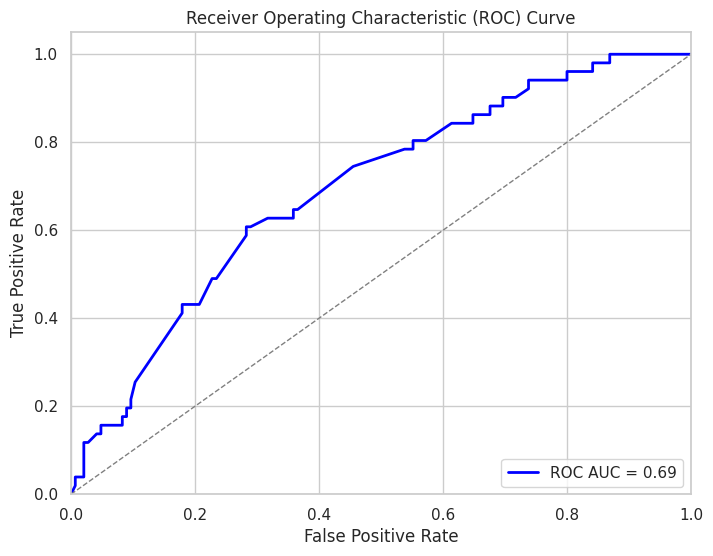

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve
import numpy as np

# Load the dataset
df = pd.read_csv('train_fe2.csv')

X = df.drop(columns=['Timestamp', 'Error_Code', 'Vibration_Mean_3'])

numeric_features = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.005, 0.01, 0.05],
    'max_depth': [2, 3, 4],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],  # L1 regularization
    'reg_lambda': [5, 10, 15]  # L2 regularization
}

# Initialize XGBoost classifier with class weight
xgb = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=3  # ADD scale_pos_weight
)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform randomized search cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_iter=100,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
print("Best Parameters:\n", random_search.best_params_)


y_proba = best_model.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

f1_scores = np.nan_to_num(2 * precisions * recalls / (precisions + recalls))
optimal_threshold = thresholds[np.argmax(f1_scores)]

y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

print("📊 Model Evaluation with Updated Features and Tuning")
print(classification_report(y_test, y_pred_optimal))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_optimal))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print(f"Optimal Threshold: {optimal_threshold:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.show()


SHAP

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:
 {'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 0.1, 'max_depth': 2, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}


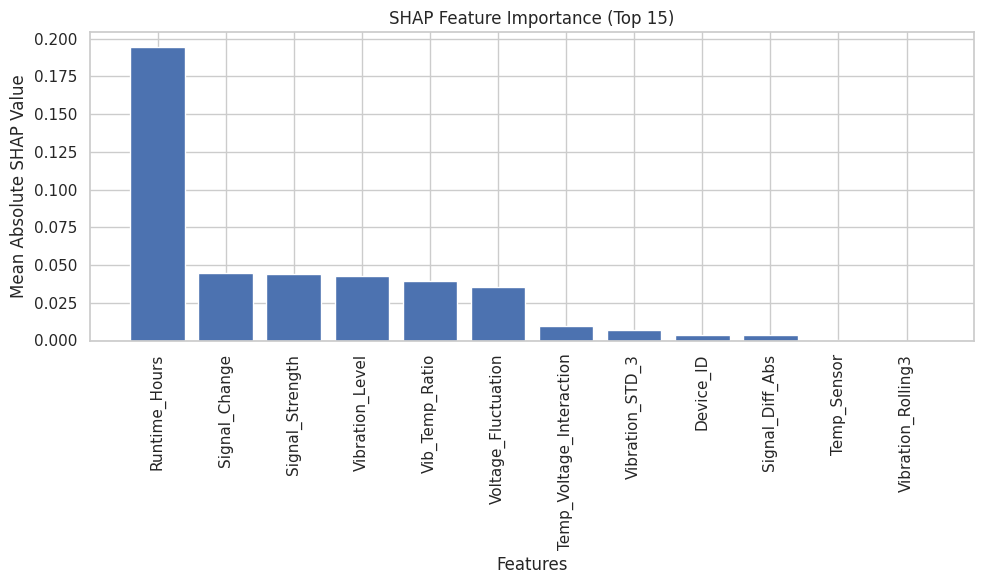


Top Contributing Features to Failures (SHAP):
                     feature  shap_importance
5              Runtime_Hours         0.194439
7              Signal_Change         0.044512
4            Signal_Strength         0.043862
2            Vibration_Level         0.042704
8             Vib_Temp_Ratio         0.039308
3        Voltage_Fluctuation         0.035688
10  Temp_Voltage_Interaction         0.009897
9            Vibration_STD_3         0.007228
0                  Device_ID         0.003812
11           Signal_Diff_Abs         0.003346
1                Temp_Sensor         0.000614
6         Vibration_Rolling3         0.000000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve
import shap

df = pd.read_csv('train_fe2.csv')

X = df.drop(columns=['Timestamp', 'Error_Code', 'Vibration_Mean_3'])
y = df['Error_Code']

numeric_features = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

param_grid = {
    'learning_rate': [0.005, 0.01, 0.05],
    'max_depth': [2, 3, 4],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0.0, 0.1, 1.0],  # L1 regularization
    'reg_lambda': [5, 10, 15]  # L2 regularization
}

# Initialize XGBoost classifier with class weight
xgb = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=3
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform randomized search cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_iter=100,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

# Get the best estimator
best_model = random_search.best_estimator_
print("Best Parameters:\n", random_search.best_params_)

# Explain model predictions using SHAP
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

N = 15
shap_values_abs = np.abs(shap_values.values).mean(axis=0)
top_indices = np.argsort(shap_values_abs)[::-1][:N]

plt.figure(figsize=(10, 6))
plt.bar(X_test.columns[top_indices], shap_values_abs[top_indices])
plt.xticks(rotation=90)
plt.title('SHAP Feature Importance (Top {})'.format(N))
plt.xlabel('Features')
plt.ylabel('Mean Absolute SHAP Value')
plt.tight_layout()
plt.show()

# Print top contributing features
feature_names = X_test.columns
shap_sum = np.abs(shap_values.values).mean(axis=0)
importance_df = pd.DataFrame([feature_names, shap_sum.tolist()]).T
importance_df.columns = ['feature', 'shap_importance']
importance_df['shap_importance'] = pd.to_numeric(importance_df['shap_importance'])
print('\nTop Contributing Features to Failures (SHAP):')
print(importance_df.sort_values('shap_importance', ascending=False))

Error_Code not found in test.csv, unable to evaluate.  Predictions generated.


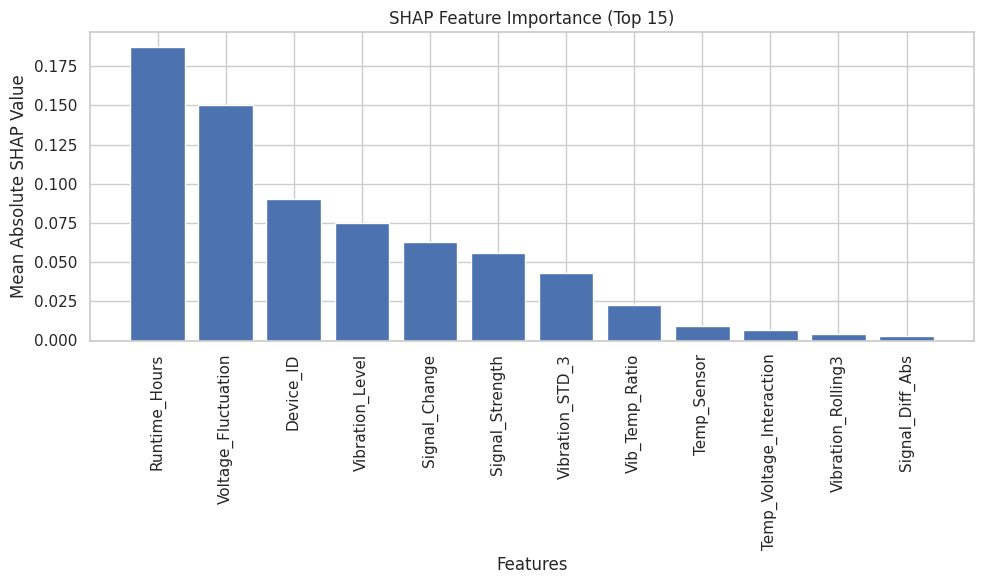


Top Contributing Features to Failures (SHAP):
                     feature  shap_importance
5              Runtime_Hours         0.187320
3        Voltage_Fluctuation         0.150302
0                  Device_ID         0.090021
2            Vibration_Level         0.075164
7              Signal_Change         0.062585
4            Signal_Strength         0.055823
8            Vibration_STD_3         0.043132
9             Vib_Temp_Ratio         0.022439
1                Temp_Sensor         0.008983
10  Temp_Voltage_Interaction         0.006919
6         Vibration_Rolling3         0.004316
11           Signal_Diff_Abs         0.002929


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import shap

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

combined_df = pd.concat([train_df, test_df], ignore_index=True)


label_encoder = LabelEncoder()

combined_df['Device_ID'] = label_encoder.fit_transform(combined_df['Device_ID'])

train_df['Device_ID'] = combined_df['Device_ID'][:len(train_df)]
test_df['Device_ID'] = combined_df['Device_ID'][len(train_df):]

train_df = train_df.sort_values(by='Timestamp')
test_df = test_df.sort_values(by='Timestamp')

if len(train_df['Device_ID'].unique()) > 1:
    train_df['Signal_Change'] = train_df.groupby('Device_ID')['Signal_Strength'].diff()
    train_df['Vibration_STD_3'] = train_df.groupby('Device_ID')['Vibration_Level'].rolling(window=3).std().reset_index(level=0, drop=True)
else:
    train_df['Signal_Change'] = train_df['Signal_Strength'].diff()
    train_df['Vibration_STD_3'] = train_df['Vibration_Level'].rolling(window=3).std()

if len(test_df['Device_ID'].unique()) > 1:
    test_df['Signal_Change'] = test_df.groupby('Device_ID')['Signal_Strength'].diff()
    test_df['Vibration_STD_3'] = test_df.groupby('Device_ID')['Vibration_Level'].rolling(window=3).std().reset_index(level=0, drop=True)
else:
    test_df['Signal_Change'] = test_df['Signal_Strength'].diff()
    test_df['Vibration_STD_3'] = test_df['Vibration_Level'].rolling(window=3).std()

train_df['Vib_Temp_Ratio'] = train_df['Vibration_Level'] / train_df['Temp_Sensor']
test_df['Vib_Temp_Ratio'] = test_df['Vibration_Level'] / test_df['Temp_Sensor']

train_df['Temp_Voltage_Interaction'] = train_df['Temp_Sensor'] * train_df['Voltage_Fluctuation']
test_df['Temp_Voltage_Interaction'] = test_df['Temp_Sensor'] * test_df['Voltage_Fluctuation']

train_df['Signal_Diff_Abs'] = train_df['Signal_Change'].abs()
test_df['Signal_Diff_Abs'] = test_df['Signal_Change'].abs()

train_df = train_df.fillna(0).reset_index(drop=True)
test_df = test_df.fillna(0).reset_index(drop=True)

X = train_df.drop(columns=['Timestamp', 'Error_Code'])
y = train_df['Error_Code']

X_test = test_df.drop(columns=['Timestamp', 'Error_Code'], errors='ignore')

numeric_features = X.select_dtypes(include=['number']).columns

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train[numeric_features])

X_train[numeric_features] = scaler.transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

best_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=3,
    learning_rate=0.01,
    max_depth=3,
    subsample=1.0,
    colsample_bytree=0.9,
    gamma=0.1,
    reg_alpha=0.0,
    reg_lambda=10
)
best_model.fit(X_train, y_train)

y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
if 'Error_Code' in test_df.columns:
    y_test = test_df['Error_Code']
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    y_pred = (y_pred_proba > 0.5).astype(int)
    print("📊 Final Evaluation on test.csv")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc}")
else:
    print("Error_Code not found in test.csv, unable to evaluate.  Predictions generated.")

explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

N = 15
shap_values_abs = np.abs(shap_values.values).mean(axis=0)
top_indices = np.argsort(shap_values_abs)[::-1][:N]

plt.figure(figsize=(10, 6))
plt.bar(X_test.columns[top_indices], shap_values_abs[top_indices])
plt.xticks(rotation=90)
plt.title('SHAP Feature Importance (Top {})'.format(N))
plt.xlabel('Features')
plt.ylabel('Mean Absolute SHAP Value')
plt.tight_layout()
plt.show()

# Print top contributing features
feature_names = X_test.columns
shap_sum = np.abs(shap_values.values).mean(axis=0)
importance_df = pd.DataFrame([feature_names, shap_sum.tolist()]).T
importance_df.columns = ['feature', 'shap_importance']
importance_df['shap_importance'] = pd.to_numeric(importance_df['shap_importance'])
print('\nTop Contributing Features to Failures (SHAP):')
print(importance_df.sort_values('shap_importance', ascending=False))


In [67]:
df = pd.read_csv('test.csv')
df.head(5)

,Timestamp,Device_ID,Temp_Sensor,Vibration_Level,Voltage_Fluctuation,Signal_Strength,Runtime_Hours,Vibration_Rolling3
0,08-01-2025 00:00,DVC-002,71.21,1.08,0.027,87.5,28,1.08
1,08-01-2025 00:10,DVC-004,73.87,0.40,0.066,87.6,99,0.40
2,08-01-2025 00:20,DVC-001,74.74,0.45,0.068,86.7,82,0.45
3,08-01-2025 00:30,DVC-004,71.51,0.70,0.040,89.3,142,0.55
4,08-01-2025 00:40,DVC-008,75.06,0.78,0.046,94.4,43,0.78


Error_Code not found in test.csv, unable to evaluate.  Predictions generated.


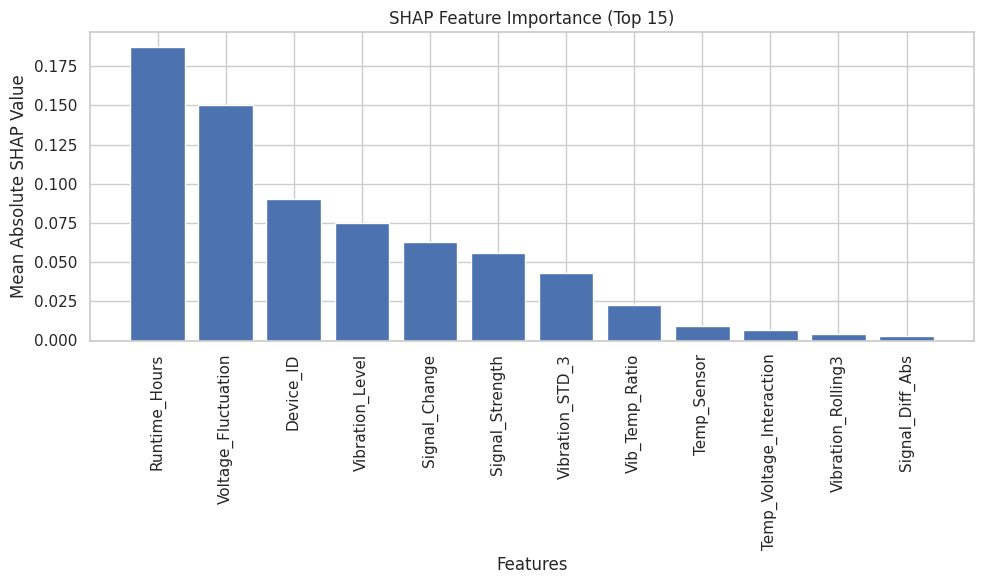


Top Contributing Features to Failures (SHAP):
                     feature  shap_importance
5              Runtime_Hours         0.187320
3        Voltage_Fluctuation         0.150302
0                  Device_ID         0.090021
2            Vibration_Level         0.075164
7              Signal_Change         0.062585
4            Signal_Strength         0.055823
8            Vibration_STD_3         0.043132
9             Vib_Temp_Ratio         0.022439
1                Temp_Sensor         0.008983
10  Temp_Voltage_Interaction         0.006919
6         Vibration_Rolling3         0.004316
11           Signal_Diff_Abs         0.002929


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import shap

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder on the combined Device_ID column
combined_df['Device_ID'] = label_encoder.fit_transform(combined_df['Device_ID'])

train_df['Device_ID'] = combined_df['Device_ID'][:len(train_df)]
test_df['Device_ID'] = combined_df['Device_ID'][len(train_df):]

# Sort by timestamp
train_df = train_df.sort_values(by='Timestamp')
test_df = test_df.sort_values(by='Timestamp')

if len(train_df['Device_ID'].unique()) > 1:
    train_df['Signal_Change'] = train_df.groupby('Device_ID')['Signal_Strength'].diff()
    train_df['Vibration_STD_3'] = train_df.groupby('Device_ID')['Vibration_Level'].rolling(window=3).std().reset_index(level=0, drop=True)
else:
    train_df['Signal_Change'] = train_df['Signal_Strength'].diff()
    train_df['Vibration_STD_3'] = train_df['Vibration_Level'].rolling(window=3).std()

if len(test_df['Device_ID'].unique()) > 1:
    test_df['Signal_Change'] = test_df.groupby('Device_ID')['Signal_Strength'].diff()
    test_df['Vibration_STD_3'] = test_df.groupby('Device_ID')['Vibration_Level'].rolling(window=3).std().reset_index(level=0, drop=True)
else:
    test_df['Signal_Change'] = test_df['Signal_Strength'].diff()
    test_df['Vibration_STD_3'] = test_df['Vibration_Level'].rolling(window=3).std()

train_df['Vib_Temp_Ratio'] = train_df['Vibration_Level'] / train_df['Temp_Sensor']
test_df['Vib_Temp_Ratio'] = test_df['Vibration_Level'] / test_df['Temp_Sensor']

train_df['Temp_Voltage_Interaction'] = train_df['Temp_Sensor'] * train_df['Voltage_Fluctuation']
test_df['Temp_Voltage_Interaction'] = test_df['Temp_Sensor'] * test_df['Voltage_Fluctuation']

train_df['Signal_Diff_Abs'] = train_df['Signal_Change'].abs()
test_df['Signal_Diff_Abs'] = test_df['Signal_Change'].abs()

train_df = train_df.fillna(0).reset_index(drop=True)
test_df = test_df.fillna(0).reset_index(drop=True)

X = train_df.drop(columns=['Timestamp', 'Error_Code'])
y = train_df['Error_Code']

X_test = test_df.drop(columns=['Timestamp', 'Error_Code'], errors='ignore')

numeric_features = X.select_dtypes(include=['number']).columns

# Split data
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()

scaler.fit(X_train[numeric_features])

# Transform the training and testing data using the fitted scaler
X_train[numeric_features] = scaler.transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

best_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=3,
    learning_rate=0.01,
    max_depth=3,
    subsample=1.0,
    colsample_bytree=0.9,
    gamma=0.1,
    reg_alpha=0.0,
    reg_lambda=10
)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
if 'Error_Code' in test_df.columns:
    y_test = test_df['Error_Code']
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    y_pred = (y_pred_proba > 0.5).astype(int) # Use 0.5 threshold
    print("📊 Final Evaluation on test.csv")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc}")
else:
    print("Error_Code not found in test.csv, unable to evaluate.  Predictions generated.")

# Interpret model predictions using SHAP (optional)
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

N = 15  # Display only the top 15 features
shap_values_abs = np.abs(shap_values.values).mean(axis=0)
top_indices = np.argsort(shap_values_abs)[::-1][:N]

plt.figure(figsize=(10, 6))
plt.bar(X_test.columns[top_indices], shap_values_abs[top_indices])
plt.xticks(rotation=90)
plt.title('SHAP Feature Importance (Top {})'.format(N))
plt.xlabel('Features')
plt.ylabel('Mean Absolute SHAP Value')
plt.tight_layout()
plt.show()

# Print top contributing features
feature_names = X_test.columns
shap_sum = np.abs(shap_values.values).mean(axis=0)
importance_df = pd.DataFrame([feature_names, shap_sum.tolist()]).T
importance_df.columns = ['feature', 'shap_importance']
importance_df['shap_importance'] = pd.to_numeric(importance_df['shap_importance'])
print('\nTop Contributing Features to Failures (SHAP):')
print(importance_df.sort_values('shap_importance', ascending=False))
